# Business Problem
We are a global superstore selling a variety of products in the categories of technology, furniture and office supplies. We are interested in understanding how our product sales fluctuate during the year and finding the primary and marginal drivers of sales, to optimize our marketing and pricing strategies. To aid in this, we want to make a forecasting model that allows us to predict our future sales on a month-by-month basis.  

# Data Collection
We acquire product sales data spanning the categories of technology, furniture and office supplies.  

In [76]:
# Installing packages
!pip install opendatasets -q

In [77]:
import opendatasets as od
import os

original_folder_name = "sales-forecasting"
new_folder_name = "sales-forecasting-dataset"

# Downloading the dataset and renaming the folder that contains it
if not os.path.exists(new_folder_name):
    od.download("https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting")
    os.rename(original_folder_name, new_folder_name)

In [78]:
# Converting .csv file to pandas DataFrame
import pandas as pd

sales_df = pd.read_csv(f"{new_folder_name}/train.csv")
sales_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [79]:
# Checking the number of rows and columns of the dataframe
sales_df.shape

(9800, 18)

## Definition of Attributes
- **Row ID**: Unique identifier for each product sale.  
- **Order ID**: Order ID related to each product sale.  
- **Order Date**: The date the order was placed.  
- **Ship Date**: The date the order was shipped.  
- **Ship Mode**: The type of shipping used to ship the order.  
- **Customer ID**: The unique identifier for the customer.  
- **Customer Name**: The name of the customer.  
- **Segment**: The type of customer, consumer, home office or corporate.  
- **Country**: The country of the customer.  
- **City**: The city of the customer.  
- **State**: The state of the customer.  
- **Postal Code**: The postal code of the customer.  
- **Region**: The region of the customer.  
- **Product ID**: The unique identifier for the particular product.  
- **Category**: The product category.  
- **Sub-Category**: The product sub-category.  
- **Product Name**: The name of the product.  
- **Sales**: The price of the product.

## Data Collection Overview
**Process**
- Downloaded sales dataset from kaggle and changed the name of the folder containing the dataset.
- Converted the dataset to a pandas DataFrame. 

**Findings**
- We notice that the sales target variable has a high range of values, which could make it difficult for predictive models to distinguish its pattern.

# Data Understanding: Exploratory Data Analysis (EDA)
We explore the distributions of attributes and the relationships between features and sales. We also ensure all attributes are in the proper format. 

In [83]:
# Checking for null values and data type of attributes
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [84]:
# Converting date features to datetime format
sales_df["Order Date"] = pd.to_datetime(sales_df["Order Date"], format="%d/%m/%Y")
sales_df["Ship Date"] = pd.to_datetime(sales_df["Ship Date"], format="%d/%m/%Y")
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [85]:
# Investigating statistical distribution of attributes
sales_df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales
count,9800.000000,9800,9800,9789.000000,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,55273.322403,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,1040.000000,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,23223.000000,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,58103.000000,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,90008.000000,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,99301.000000,22638.480000
std,2829.160653,NaN,NaN,32041.223413,626.651875


In [86]:
# Checking the cardinality of attributes
sales_df.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

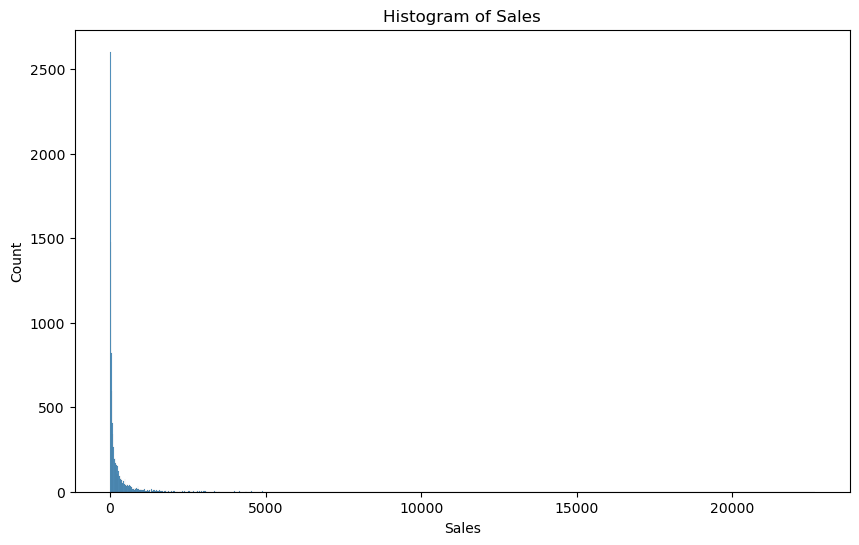

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a histogram of sales to determine skewness
plt.figure(figsize=(10, 6))
sns.histplot(data=sales_df, x="Sales")

plt.title("Histogram of Sales")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

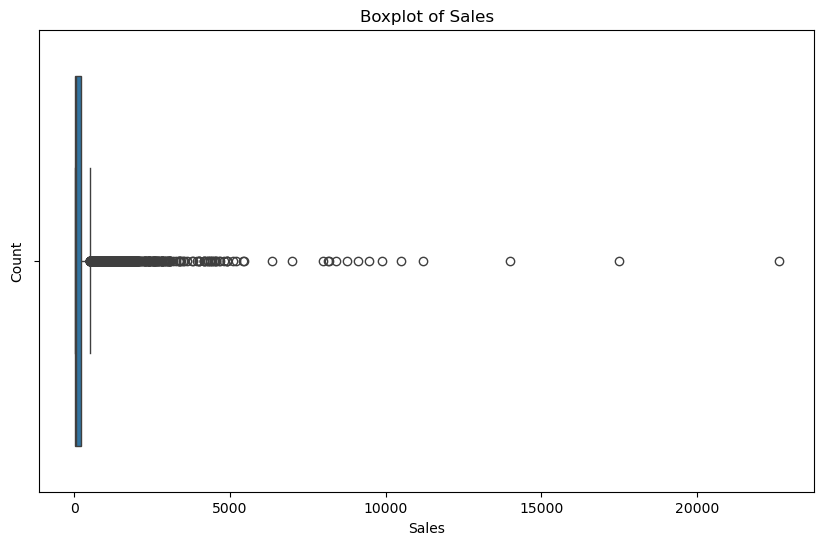

In [88]:
# Creating a boxplot of the distribution of sales to determine outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=sales_df, x="Sales")

plt.title("Boxplot of Sales")
plt.xlabel("Sales")
plt.ylabel("Count")
plt.show()

In [89]:
# Sorting the sales dataframe by order data
sales_df = sales_df.sort_values(by=["Order Date"])

# Creating year, months, months elapsed and day of month features
sales_df["Year"] = sales_df["Order Date"].dt.year
sales_df["Month"] = sales_df["Order Date"].dt.month
sales_df["Months Elapsed"] = (sales_df["Order Date"].dt.year - sales_df["Order Date"].dt.year.min()) * 12 + sales_df["Order Date"].dt.month
sales_df["Day of Month"] = sales_df["Order Date"].dt.day

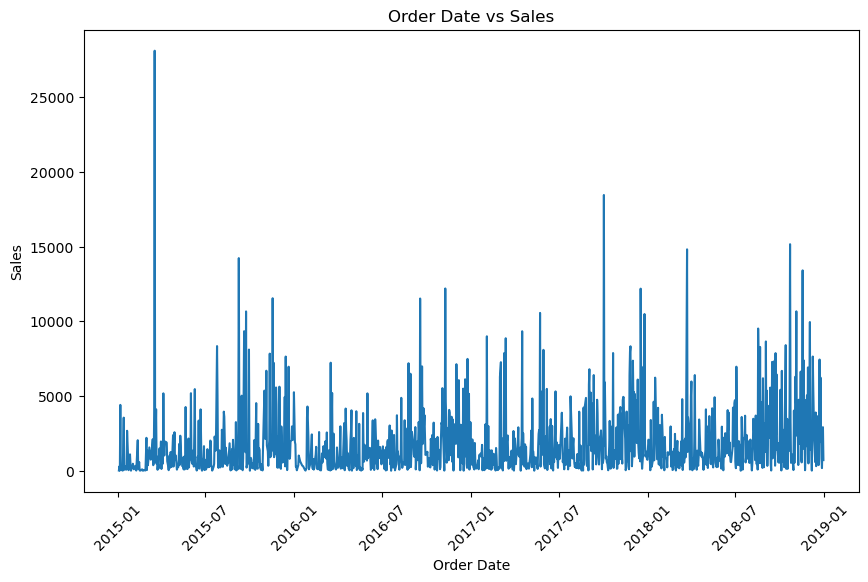

In [90]:
# Creating a line plot of total sales by order date
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x="Order Date", y="Sales", estimator="sum", errorbar=None)

plt.title("Order Date vs Sales")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

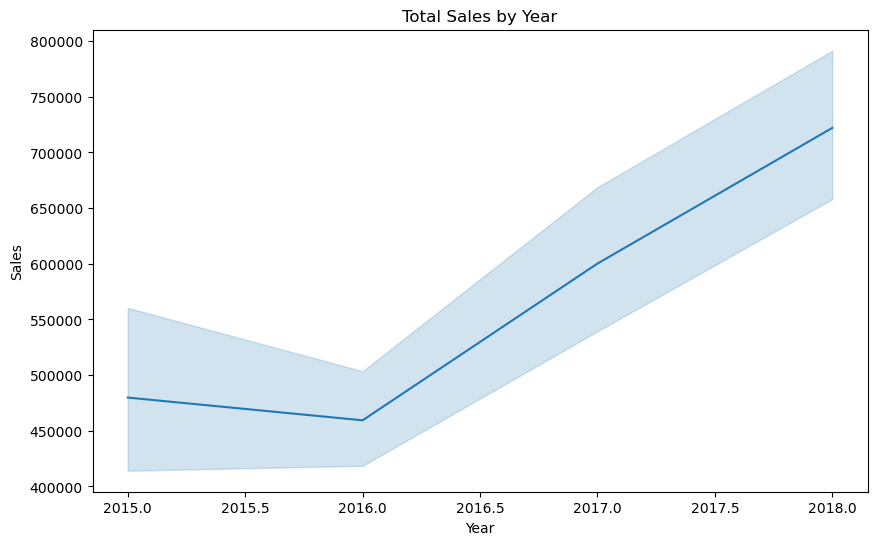

In [91]:
# Creating a line plot of total sales by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x="Year", y="Sales", estimator="sum")

plt.title("Total Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

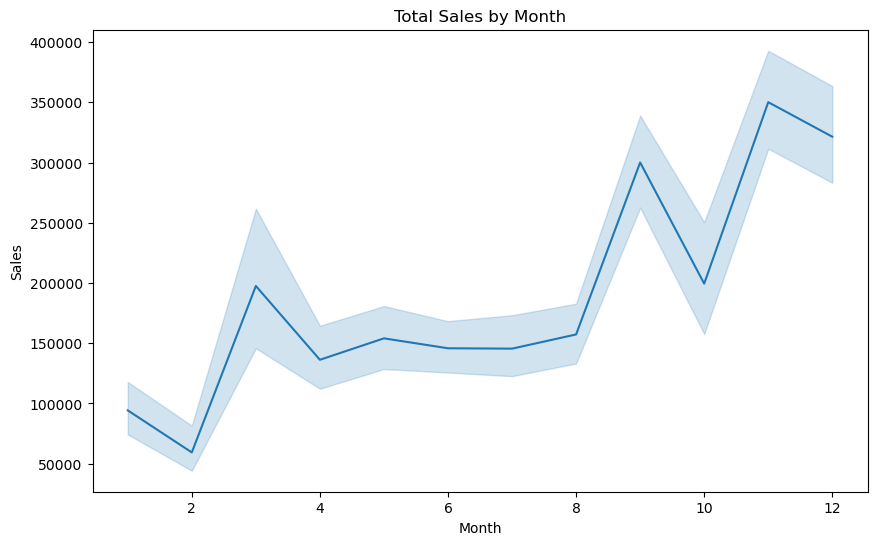

In [92]:
# Creating a line plot of total sales by month
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x="Month", y="Sales", estimator="sum")

plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

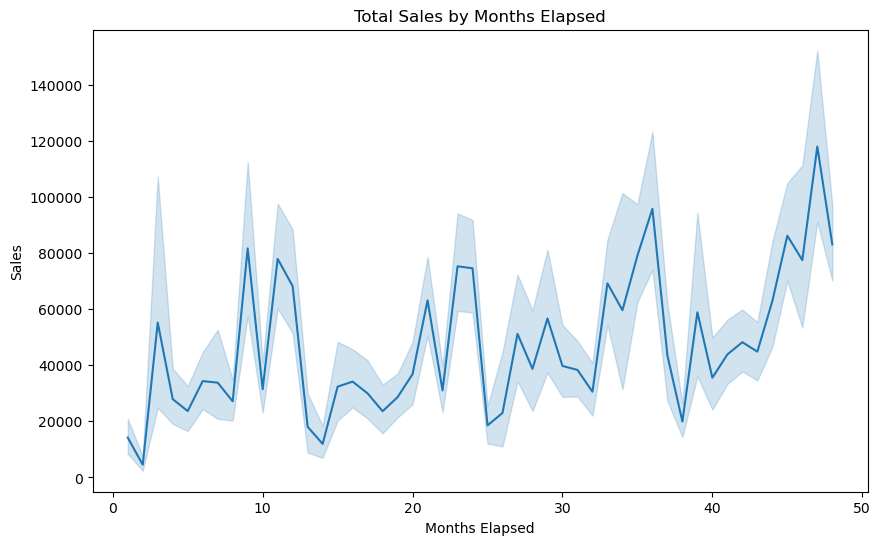

In [93]:
# Creating a line plot of total sales by months elapsed since 2015 (dataset start date)
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x="Months Elapsed", y="Sales", estimator="sum")

plt.title("Total Sales by Months Elapsed")
plt.xlabel("Months Elapsed")
plt.ylabel("Sales")
plt.show()

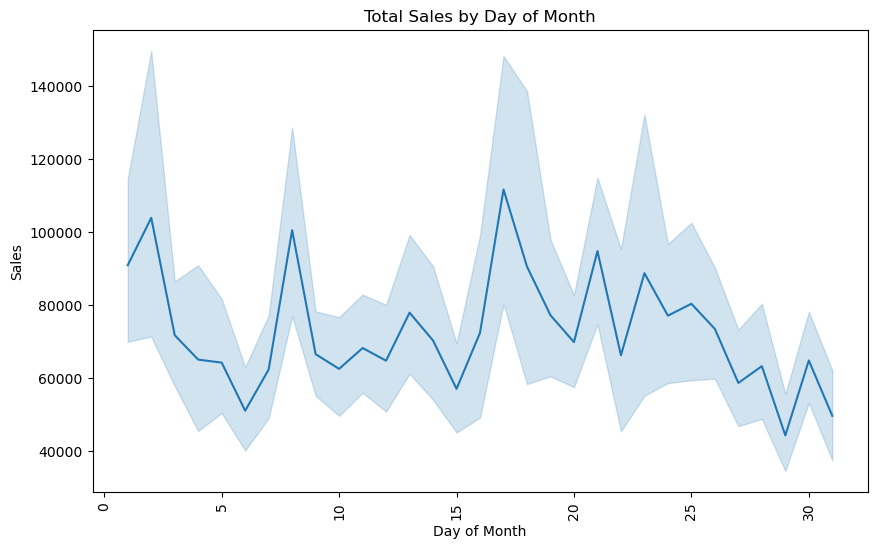

In [94]:
# Creating a line plot of total sales by day of the month
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_df, x="Day of Month", y="Sales", estimator="sum")

plt.title("Total Sales by Day of Month")
plt.xticks(rotation=90)
plt.xlabel("Day of Month")
plt.ylabel("Sales")
plt.show()

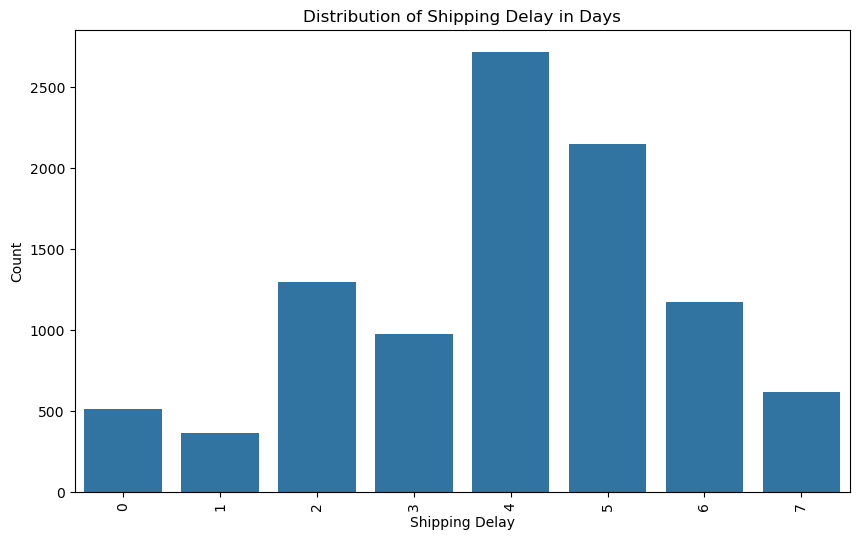

In [95]:
# Creating a count plot of shipping delay in days (difference between order date and ship date)
sales_df["Shipping Delay"] = (sales_df["Ship Date"] - sales_df["Order Date"]).dt.days

plt.figure(figsize=(10, 6))
sns.countplot(data=sales_df, x="Shipping Delay")

plt.title("Distribution of Shipping Delay in Days")
plt.xlabel("Shipping Delay")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

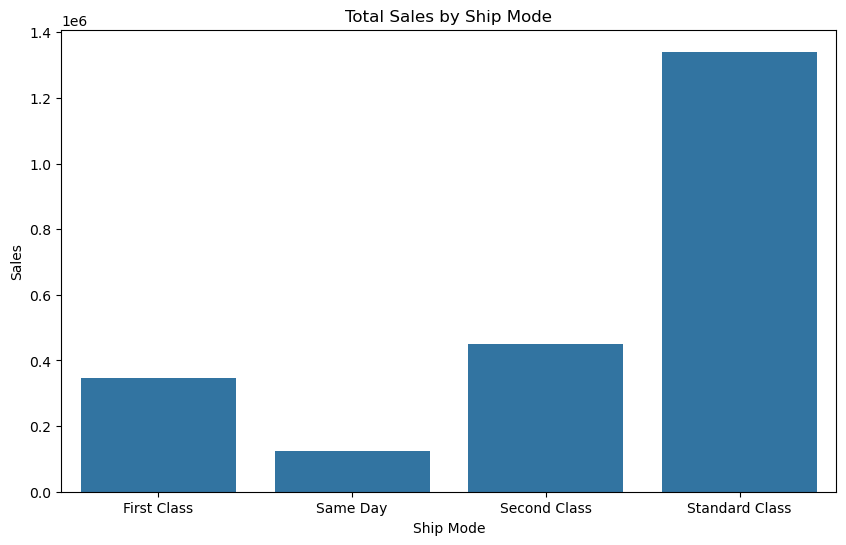

In [96]:
# Creating a barplot of total sales by ship mode
ship_mode_sales = sales_df.groupby("Ship Mode")["Sales"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=ship_mode_sales, x="Ship Mode", y="Sales")

plt.title("Total Sales by Ship Mode")
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.show()

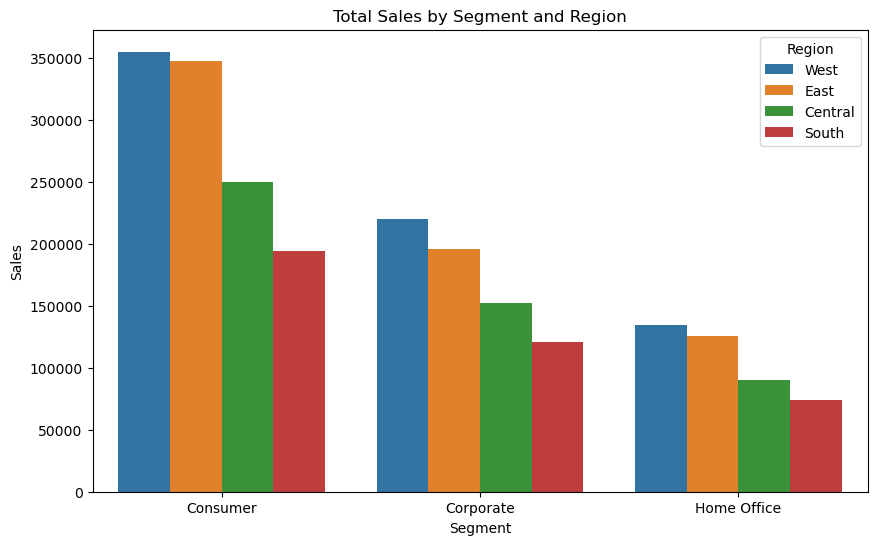

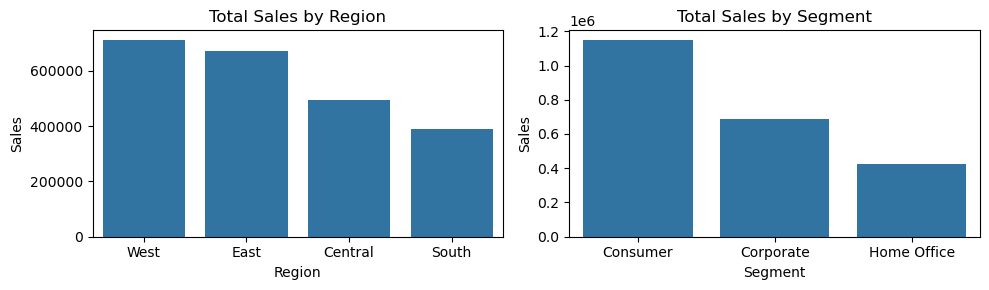

In [97]:
# Creating a barplot of total sales by segment and region
plt.figure(figsize=(10, 6))
segment_sales = sales_df.groupby(["Region", "Segment"], as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=segment_sales, x="Segment", y="Sales", hue="Region")

plt.title("Total Sales by Segment and Region")
plt.xlabel("Segment")
plt.ylabel("Sales")

# Creating a barplot of total sales by region 
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
region_total_sales = sales_df.groupby("Region", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=region_total_sales, x="Region", y="Sales", ax=axes[0])
axes[0].set_title("Total Sales by Region")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Sales")

# Creating a barplot of total sales by segment
region_total_sales = sales_df.groupby("Segment", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=region_total_sales, x="Segment", y="Sales", ax=axes[1])
axes[1].set_title("Total Sales by Segment")
axes[1].set_xlabel("Segment")
axes[1].set_ylabel("Sales")

# Preventing overlap of plot elements and showing all plots
plt.tight_layout()
plt.show()

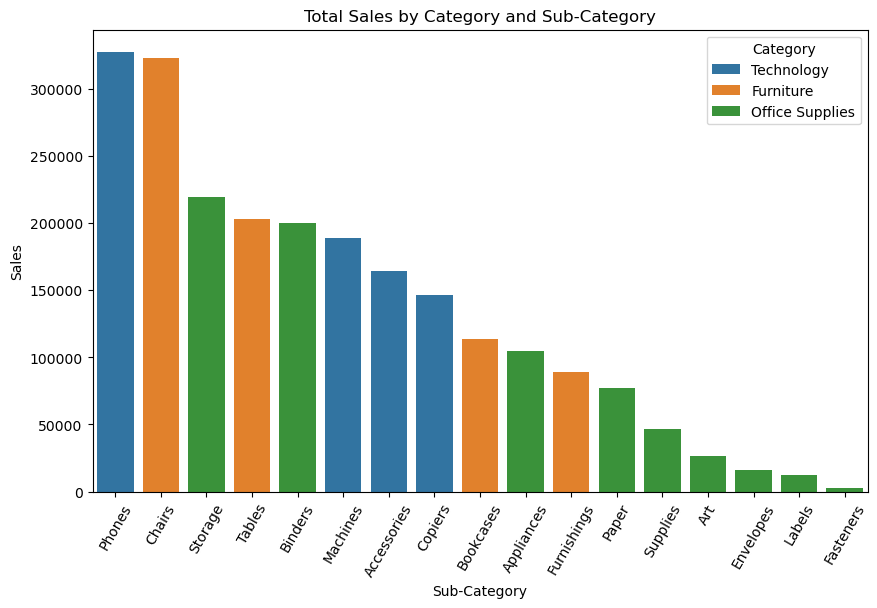

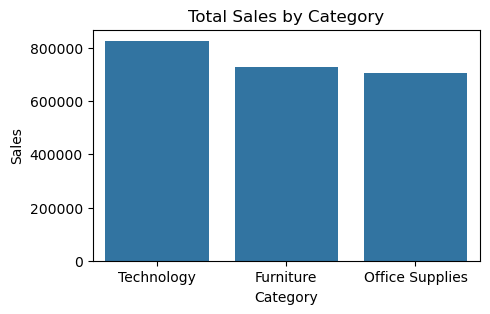

In [98]:
# Creating a barplot of total sales by category and subcategory
plt.figure(figsize=(10, 6))
sub_category_sales = sales_df.groupby(["Category", "Sub-Category"], as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=sub_category_sales, x="Sub-Category", y="Sales", hue="Category")

plt.title("Total Sales by Category and Sub-Category")
plt.xticks(rotation=60)
plt.xlabel("Sub-Category")
plt.ylabel("Sales")

# Creating a barplot of total sales by category
plt.figure(figsize=(5, 3))
region_total_sales = sales_df.groupby("Category", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=region_total_sales, x="Category", y="Sales")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

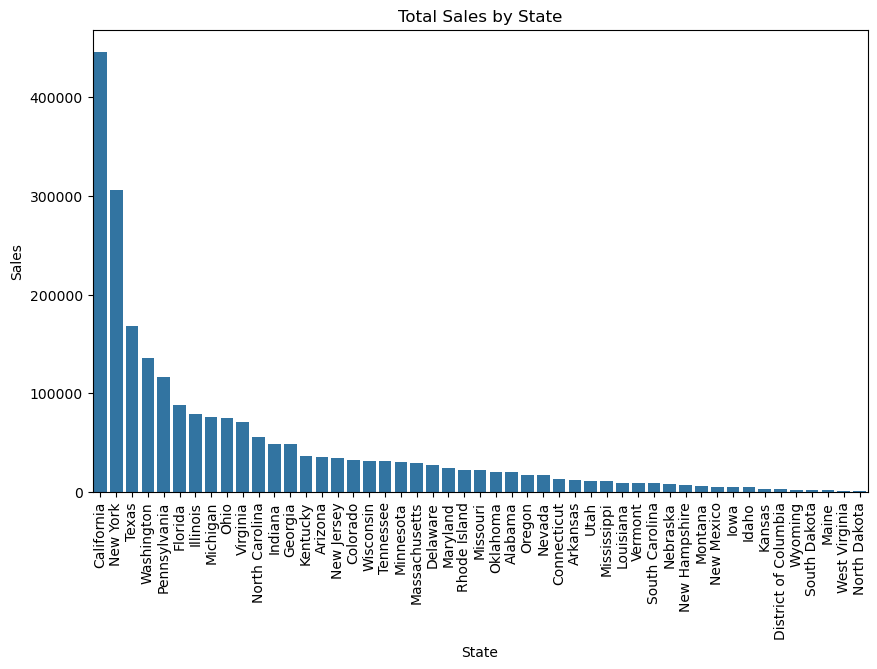

In [99]:
# Creating a bar plot of total sales by state
plt.figure(figsize=(10, 6))
state_sales = sales_df.groupby("State", as_index=False)["Sales"].sum().sort_values(by="Sales", ascending=False)
sns.barplot(data=state_sales, x="State", y="Sales")

plt.title("Total Sales by State")
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Sales")
plt.show()

In [100]:
# Installing folium for geographical plotting 
!pip install folium -q

In [101]:
# Creating a choropleth map of total sales by state
import folium # For displaying interactive maps
from IPython.display import Image, display # For displaying a static image

# Getting the total sales for each state
state_sales = sales_df.groupby("State", as_index=False)["Sales"].sum()

# Loading the geoJSON data of states in USA
geojson_url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/refs/heads/master/data/geojson/us-states.json"

# Creating a map of USA
USA_map = folium.Map(location=[37.8, -96], zoom_start=4)

# Ensuring the state column matches the state key in the geoJSON file
state_sales = state_sales.rename(columns={"State": "name"})

# Creating the choropleth map
folium.Choropleth(
    geo_data=geojson_url, 
    name="Total sales by state", 
    data=state_sales, 
    columns=["name", "Sales"], 
    key_on="feature.properties.name", # Location of key to state value in geojson file 
    fill_color="YlOrRd",
    fill_opacity=0.7, 
    line_opacity=0.2, 
    legend_name="Total Sales",
).add_to(USA_map)

# Adding tooltips with state names to the choropleth map
folium.GeoJson(
    data=geojson_url, 
    name="State names", 
    style_function=lambda feature: {
        "fillColor": "transparent", 
        "color": "transparent", 
        "weight": 0.2,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["name"], 
        aliases=["State:"], 
        style=("background-color: white; color: black; font-size: 12px; padding: 3px;")
    )
).add_to(USA_map)

try:
    # Try to display the interactive map
    USA_map
except:
    # If interactive map cannot be displayed, switch to static image
    display(Image(filename='images/states_map.jpg'))

## Data Understanding Overview
**Process**
- Checked for null values and incorrect data types.
- Converted features "Order Date" and "Ship Date" to datetime format.
- Investigated the statistical distribution of attributes. 
- Checked cardinality of attributes. 
- Made a histogram of sales to determine skewness. 
- Made a boxplot of sales to determine outliers. 
- Created date features from the feature "Order Date". 
- Created line plots of all date features vs total sales to determine the linearity and seasonality of sales.
- Created the feature "Shipping Delay" as the difference between order date and ship date and made a count plot of its distribution.
- Created bar plots of low cardinality features vs total sales.
- Created a folium map showing total sales by state.

**Findings**
- Only the postal code feature has missing values, but since we have other geographical features, we chose not to impute them.
- Sales are heavily skewed to the left, with 75% of all sales being less than 210 dollars. 
- There are quite a bit of sales outliers, with the highest sale being over 22 thousand dollars.
- We see a yearly linear upward trend in sales with a repeating yearly seasonal cycle.
- The sales tend to be the highest in November and the lowest in February.
- The most frequent shipping delay time is 4 days. 
- The standard class ship mode is by far the most profitable ship mode in terms of sales and the same day is the least profitable.
- The west region has the most sales across all segments, closely followed by the east region, whereas the south region has the lowest sales.
- The consumer segment contributes the most to sales, with double the sales of the corporate segment and triple the sales of the home office segment. 
- Phones and chairs contribute the most to sales of all Sub-Categories and fasteners contribute the least. 
- Sales across product categories are quite equal, with the technology category slightly ahead. 
- California and New York are the most profitable states, while West Virginia and North Dakota are the least profitable. 

# Data Preprocessing
We perform data cleaning to prepare for time series analysis.
We check the data for duplicates as well as missing and invalid values and drop unnecessary features. 

In [104]:
# Checking for duplicate rows
sales_df.duplicated().sum()

0

In [105]:
# Checking for invalid names
invalid_names = sales_df[sales_df["Customer Name"].str.contains(r"\d", na=False)]
invalid_names

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Year,Month,Months Elapsed,Day of Month,Shipping Delay


In [106]:
# Ensuring no string values have leading or trailing spaces
sales_df = sales_df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [107]:
# Checking the cardinality of features
sales_df.nunique()

Row ID            9800
Order ID          4922
Order Date        1230
Ship Date         1326
Ship Mode            4
Customer ID        793
Customer Name      793
Segment              3
Country              1
City               529
State               49
Postal Code        626
Region               4
Product ID        1861
Category             3
Sub-Category        17
Product Name      1849
Sales             5757
Year                 4
Month               12
Months Elapsed      48
Day of Month        31
Shipping Delay       8
dtype: int64

In [108]:
# Removing high cardinality and unique identifier features from the final dataframe
sales_df_final = sales_df.copy()
sales_df_final.drop(columns=["Row ID", "Order ID", "Customer ID", "Customer Name", "Product ID", 
                             "Product Name", "Ship Date"], axis=1, inplace=True)

# Removing redundant features
sales_df_final.drop(columns=["Country", "City", "Postal Code", "Day of Month"], axis=1, inplace=True)

# Removing unknown features at the time of forecasting
sales_df_final.drop(columns=["Shipping Delay", "Segment", "State", "Region", "Ship Mode", "Category", "Sub-Category"], axis=1, inplace=True)

# Showing final selection of attributes
sales_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9800 entries, 7980 to 5091
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      9800 non-null   datetime64[ns]
 1   Sales           9800 non-null   float64       
 2   Year            9800 non-null   int32         
 3   Month           9800 non-null   int32         
 4   Months Elapsed  9800 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 344.5 KB


## Data Preprocessing Overview
**Process**
- Checked for duplicate rows. 
- Checked if any customer's name contains integers. 
- Ensured no string values have leading or trailing spaces. 
- Checked the cardinality of features.
- Dropped high cardinality, unique identifier and redundant features. 
- Dropped unknown features at the time of forecasting and any feature we cannot determine with certainty. 

**Findings**
- There are no duplicated values.
- The only missing values was for the redundant postal codes feature.
- There are no invalid names containing digits.

# Model Training and Evaluation
We train statistical models to make monthly sales forecasts.

In [111]:
# Installing packages
!pip install pmdarima -q

In [112]:
# Importing packages
# Mathematical operations
import numpy as np

# Preprocessing
from sklearn.preprocessing import OneHotEncoder

# Models
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Parameter selection
import pmdarima as pm
from statsmodels.tsa.seasonal import seasonal_decompose

# Metrics
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# Datetime operations
from datetime import datetime

Text(0.5, 1.0, 'Numerical Correlation between Timebased Features')

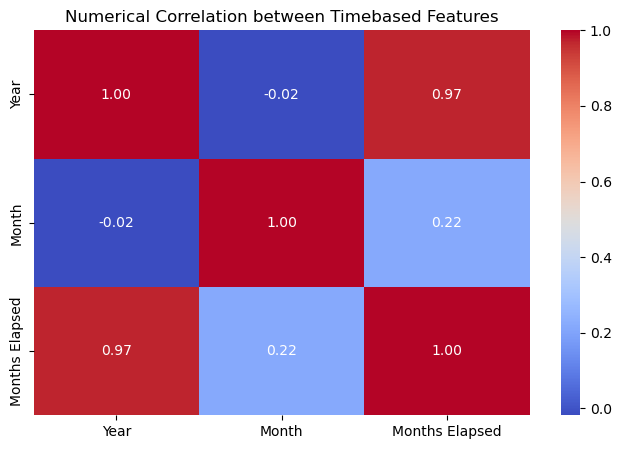

In [113]:
# Checking collinearity between timebased features
correlation_matrix = sales_df_final[["Year", "Month", "Months Elapsed"]].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Numerical Correlation between Timebased Features")

In [114]:
# Data preparation
# Creating a monthly index for sales
sales_df_final["Date by Month"] = sales_df_final["Order Date"].dt.to_period("M").dt.to_timestamp(how="end").dt.normalize()

# Aggregating daily sales to monthly sales 
monthly_sales = sales_df_final.groupby("Date by Month")[["Sales"]].sum()

# Using winsorization to cap extreme outliers to the 99th quantile of sales
upper_limit = monthly_sales["Sales"].quantile(0.99)
monthly_sales["Sales"] = monthly_sales["Sales"].clip(upper=upper_limit)

# Reducing skewness of data to prepare it for statistical modeling
monthly_sales["Log Sales"] = np.log1p(monthly_sales["Sales"])

# Numerical features that maximize model performance
num_features = ["Month", "Months Elapsed"]

# Aggregating features 
selected_features_agg = sales_df_final[num_features].groupby(sales_df_final["Date by Month"]).mean()
                     
# Defining features
X_monthly = selected_features_agg

# Selecting historical sales data to display
months_to_show = 24
historical_sales = monthly_sales[monthly_sales.index >= (monthly_sales.index.max() - pd.DateOffset(months=months_to_show))]

# Making data preparation function
def prepare_data(monthly_sales, X_monthly=None, forecast_horizon=6):
    # Getting the logged sales for the training period
    y_log_train = monthly_sales["Log Sales"].iloc[:-forecast_horizon]

    # Getting the true sales for the forecasting horizon
    y_true = monthly_sales["Sales"].iloc[-forecast_horizon:]
    
    # Splitting exogenous variables into training and testing
    if X_monthly is not None:
        X_train = X_monthly.iloc[:-forecast_horizon]
        X_test = X_monthly.iloc[-forecast_horizon:]
    else:
        X_train = None
        X_test = None

    return y_log_train, y_true, X_train, X_test, forecast_horizon

# Preparing data
y_log_train, y_true, X_train, X_test, forecast_horizon = prepare_data(monthly_sales, X_monthly, forecast_horizon=6)

In [115]:
# Creating a function to make evaluation metrics for a given model
def evaluate_model(model_name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred) # Absolute forecasting errors
    rmse = root_mean_squared_error(y_true, y_pred) # Penalizes larger forecasting errors
    mape = mean_absolute_percentage_error(y_true, y_pred) # Relative forecasting errors
    forecast_bias = np.mean(y_pred - y_true) # Indicates tendency to overpredict or underpredict

    evaluations = (
        f"{model_name}\n"
        f"mae: {mae}\n"
        f"mape: {mape}\n"
        f"rmse: {rmse}\n"
        f"forecast_bias: {forecast_bias}"
    )

    return evaluations

ARIMA Model parameters (p, d, q): (0, 1, 1)
ARIMA Model
mae: 33705.38534297693
mape: 0.37625063999306146
rmse: 40405.44827857876
forecast_bias: -33617.92043113206


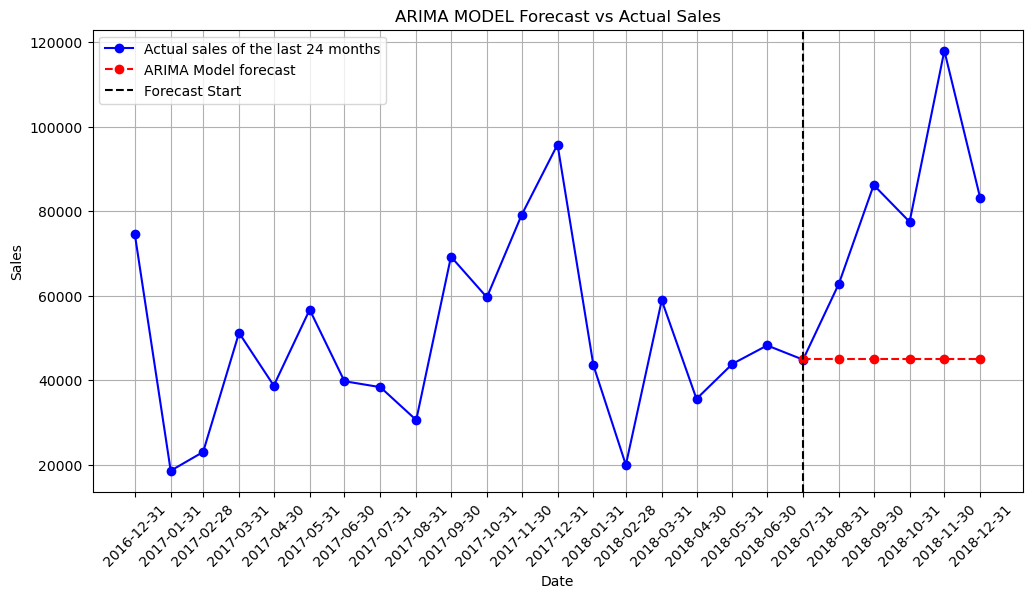

ARIMAX Model parameters (p, d, q): (2, 0, 2)
ARIMAX Model
mae: 9778.134146426777
mape: 0.16497833871305037
rmse: 12677.44478570439
forecast_bias: 6475.650739156623


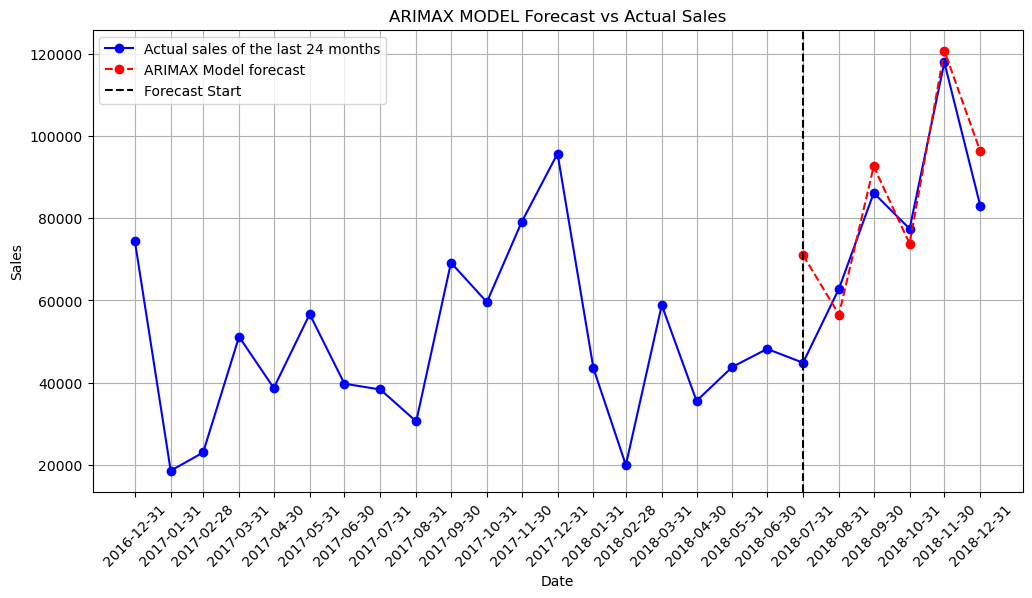

In [116]:
# ARIMAX and ARIMA forecast (with and without exogenous variables)
# Creating a forecast function
def forecast_arima(name, y_log_train, y_true, X_train=None, X_test=None):    
    # Defining the model
    arima_model = pm.auto_arima(
        y=y_log_train, 
        X=X_train, 
        seasonal=False, 
        stepwise=True, 
        trace=False, 
        error_action="ignore"
    )
    
    # Getting the model parameters
    print(f"{name} parameters (p, d, q): {arima_model.order}")
    
    # Forecasting the logged sales for the forecasting horizon
    arima_log_forecast = arima_model.predict(n_periods=forecast_horizon, X=X_test)
    
    # Reversing log transformation to get sales in their original scale
    arima_forecast = np.expm1(arima_log_forecast)
    
    # Evaluating the model
    arima_evaluation = evaluate_model(name, y_true, arima_forecast)
    print(arima_evaluation)
    
    # Plotting actual sales data for the last 24 months
    plt.figure(figsize=(12,6))
    plt.plot(historical_sales.index, historical_sales["Sales"], marker = "o", label="Actual sales of the last 24 months", color="blue")
    
    # Plotting ARIMA forecast for the next 6 months
    plt.plot(y_true.index, arima_forecast, marker = "o", label=f"{name} forecast", color="red", linestyle="dashed")
    
    # Formatting plot
    plt.title(f"{name.upper()} Forecast vs Actual Sales")
    plt.xlabel("Date")
    plt.xticks(historical_sales.index, rotation=45)
    plt.ylabel("Sales")
    plt.axvline(x=y_true.index[0], color='black', linestyle='--', label="Forecast Start")
    plt.legend()
    plt.grid(True)
    plt.show()

    return arima_model, arima_forecast, arima_evaluation

# Creating an ARIMA forecast (no exogenous variables) for the past 6 months
arima_model, arima_forecast, arima_evaluation = forecast_arima(
    "ARIMA Model", y_log_train, y_true
)

# Creating an ARIMAX forecast (with exogenous variables) for the past 6 months
arimax_model, arimax_forecast, arimax_evaluation = forecast_arima(
    "ARIMAX Model", y_log_train, y_true, X_train, X_test
)

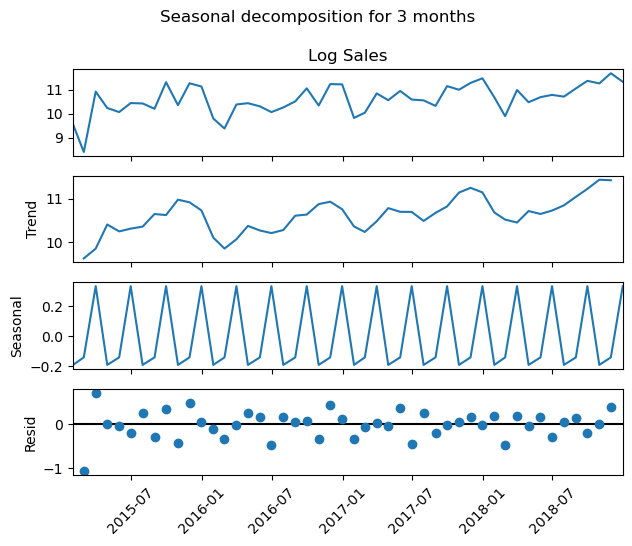

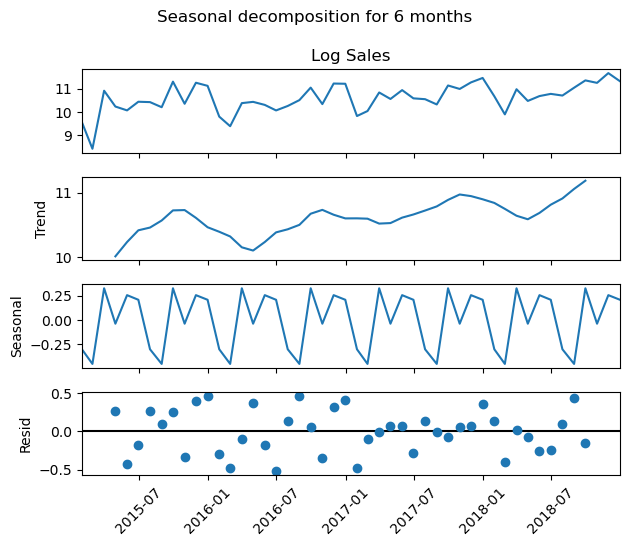

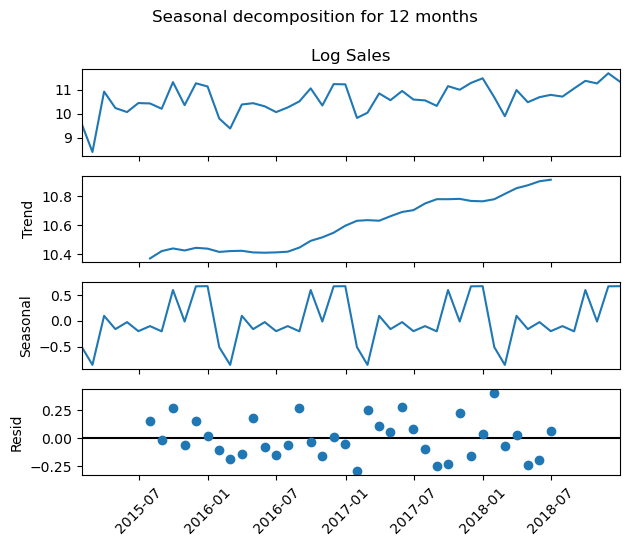

In [117]:
# Determining seasonality of sales data
m_values = [3, 6, 12]

# Getting the logged sales
all_logged_sales = monthly_sales["Log Sales"]

# Checking seasonal decomposition for 3, 6 and 12 months
for value in m_values:
    decomposition = seasonal_decompose(all_logged_sales, model="additive", period=value)
    decomposition.plot()
    plt.suptitle(f"Seasonal decomposition for {value} months", y=1.05)
    plt.xticks(rotation=45)
    
plt.show()

SARIMA Model parameters (p, d, q): (3, 1, 1)
SARIMA Model seasonal parameters (P, D, Q, m): (1, 0, 0, 12)
SARIMA Model
mae: 20400.433225758603
mape: 0.25129443571970606
rmse: 24299.843470543296
forecast_bias: -16584.904566606914


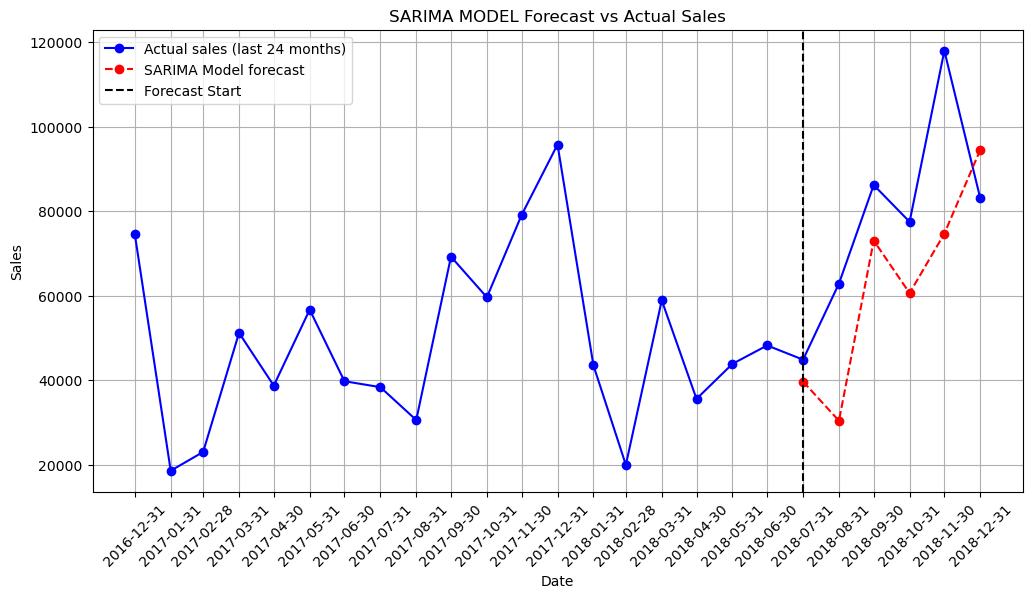

SARIMAX Model parameters (p, d, q): (1, 0, 1)
SARIMAX Model seasonal parameters (P, D, Q, m): (1, 0, 0, 12)
SARIMAX Model
mae: 13849.92475483128
mape: 0.17220217773325275
rmse: 16974.50277463091
forecast_bias: -2707.191296175572


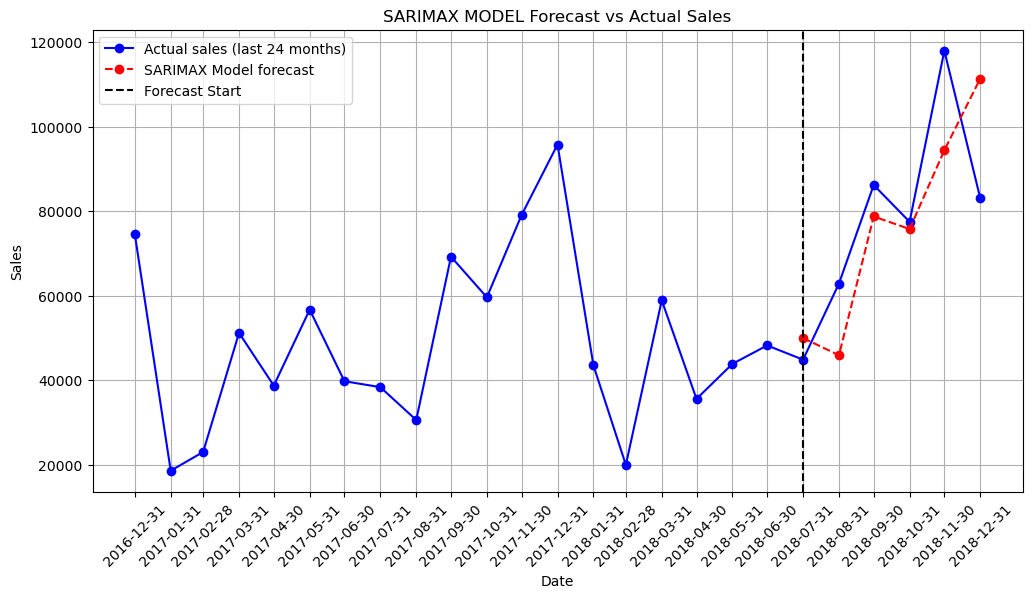

In [118]:
# SARIMAX and SARIMA forecast (with and without exogenous variables)
# Creating a forecast function
def forecast_sarima(name, y_log_train, y_true, X_train=None, X_test=None, m=12):
    # Defining the model with seasonality based on seasonal decomposition
    sarima_model = pm.auto_arima(
        y=y_log_train, 
        X=X_train, 
        seasonal=True, 
        m=m, 
        stepwise=True, 
        trace=False, 
        error_action="ignore"
    )

    # Getting the model parameters
    print(f"{name} parameters (p, d, q): {sarima_model.order}")
    print(f"{name} seasonal parameters (P, D, Q, m): {sarima_model.seasonal_order}")

    # Forecasting the logged sales for the forecasting horizon
    sarima_log_forecast = sarima_model.predict(n_periods=forecast_horizon, X=X_test)
    
    # Reversing log transformation to get sales in their original scale
    sarima_forecast = np.expm1(sarima_log_forecast)

    # Evaluating the model
    sarima_evaluation = evaluate_model(name, y_true, sarima_forecast)
    print(sarima_evaluation)

    # Plotting actual sales data for the last 24 months
    plt.figure(figsize=(12,6))
    plt.plot(historical_sales.index, historical_sales["Sales"], marker="o", label="Actual sales (last 24 months)", color="blue")
    
    # Plotting SARIMA forecast for the next 6 months
    plt.plot(y_true.index, sarima_forecast, marker="o", label=f"{name} forecast", color="red", linestyle="dashed")
    
    # Formatting plot
    plt.title(f"{name.upper()} Forecast vs Actual Sales")
    plt.xlabel("Date")
    plt.xticks(historical_sales.index, rotation=45)
    plt.ylabel("Sales")
    plt.axvline(x=y_true.index[0], color='black', linestyle='--', label="Forecast Start")
    plt.legend()
    plt.grid(True)
    plt.show()

    return sarima_model, sarima_forecast, sarima_evaluation

# Creating a SARIMA forecast (no exogenous variables) for the past 6 months
sarima_model, sarima_forecast, sarima_evaluation = forecast_sarima(
    "SARIMA Model", y_log_train, y_true, m=12
)

# Creating a SARIMAX forecast (with exogenous variables) for the past 6 months
sarimax_model, sarimax_forecast, sarimax_evaluation = forecast_sarima(
    "SARIMAX Model", y_log_train, y_true, X_train, X_test, m=12
)

Holt-Winters' Seasonal Model
mae: 16070.377373211168
mape: 0.21071893566087518
rmse: 18830.553390685694
forecast_bias: 2168.724991202163


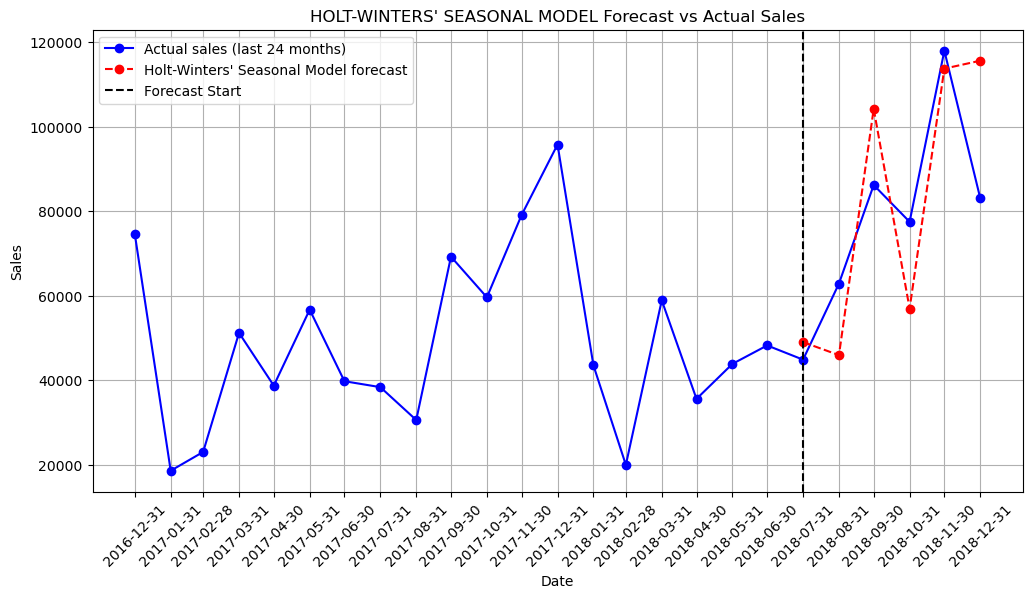

In [119]:
# Holt-Winters' seasonal forecast (no exogenous variables)
# Creating a forecast function  
def forecast_hw(name, y_log_train, y_true, seasonal_periods=12):
    # Getting the logged sales for the training period
    y_log_train = monthly_sales["Log Sales"].iloc[:-forecast_horizon]

    # Getting the true sales for the forecasting horizon
    y_true = monthly_sales["Sales"].iloc[-forecast_horizon:]
    
    # Defining the model with seasonality based on seasonal decomposition 
    hw_model = ExponentialSmoothing(
        endog=y_log_train, 
        trend="additive", 
        seasonal="additive", 
        seasonal_periods=seasonal_periods, 
        initialization_method="estimated", 
        freq="ME"
    )
    
    # Fitting the model
    hw_model = hw_model.fit()

    # Forecasting the logged sales for the forecasting horizon
    hw_log_forecast = hw_model.forecast(forecast_horizon)

    # Reversing log transformation to get sales in their original scale
    hw_forecast = np.expm1(hw_log_forecast)

    # Evaluating the model
    hw_evaluation = evaluate_model(name, y_true, hw_forecast)
    print(hw_evaluation)

    # Plotting actual sales data for the last 24 months
    plt.figure(figsize=(12,6))
    plt.plot(historical_sales.index, historical_sales["Sales"], marker="o", label="Actual sales (last 24 months)", color="blue")
    
    # Plotting Holt-Winters' seasonal forecast for the next 6 months
    plt.plot(y_true.index, hw_forecast, marker="o", label=f"{name} forecast", color="red", linestyle="dashed")
    
    # Formatting plot
    plt.title(f"{name.upper()} Forecast vs Actual Sales")
    plt.xlabel("Date")
    plt.xticks(historical_sales.index, rotation=45)
    plt.ylabel("Sales")
    plt.axvline(x=y_true.index[0], color='black', linestyle='--', label="Forecast Start")
    plt.legend()
    plt.grid(True)
    plt.show()

    return hw_model, hw_forecast, hw_evaluation

# Making a Holt-Winters' seasonal forecast for the past 6 months
hw_model, hw_forecast, hw_evaluation = forecast_hw(
    "Holt-Winters' Seasonal Model", y_log_train, y_true, seasonal_periods=12
)

In [120]:
# Evaluating statistical models
print(f"{arima_evaluation}\n")
print(f"{arimax_evaluation}\n")
print(f"{sarima_evaluation}\n")
print(f"{sarimax_evaluation}\n")
print(f"{hw_evaluation}")

ARIMA Model
mae: 33705.38534297693
mape: 0.37625063999306146
rmse: 40405.44827857876
forecast_bias: -33617.92043113206

ARIMAX Model
mae: 9778.134146426777
mape: 0.16497833871305037
rmse: 12677.44478570439
forecast_bias: 6475.650739156623

SARIMA Model
mae: 20400.433225758603
mape: 0.25129443571970606
rmse: 24299.843470543296
forecast_bias: -16584.904566606914

SARIMAX Model
mae: 13849.92475483128
mape: 0.17220217773325275
rmse: 16974.50277463091
forecast_bias: -2707.191296175572

Holt-Winters' Seasonal Model
mae: 16070.377373211168
mape: 0.21071893566087518
rmse: 18830.553390685694
forecast_bias: 2168.724991202163


## Model Training and Evaluation Overview
**Process**
- Imported all packages needed for statistical modeling. 
- Checked for collinearity between timebased features.
- Aggregated daily sales to monthly sales.
- Used winsorization to cap extreme outliers. 
- Reduced skewness of data by getting the logarithm of sales. 
- Aggregated timebased features by month. 
- Selected historical sales data of 24 months to display. 
- Split data into training and testing. 
- Created function to evaluate models. 
- Calculated, visualized and evaluated ARIMA forecasts with and without exogenous variables, using logged sales. 
- Created a seasonal decomposition plot for varying monthly seasons. 
- Calculated, visualized and evaluated SARIMA forecasts with and without exogenous variables, using logged sales and seasonality from the seasonal decomposition plot. 
- Calculated, visualized and evaluated a Holt-Winters' Seasonal forecast, using logged sales. 
- Evaluated all models to determine the best one based on primarily MAPE.

**Findings**
- There is an extremely high collinearity between year and months elapsed at 0.97. To avoid unstable and unreliable models, we ensure that we only include one of these. 
- The seasonal decomposition plots reveal that sales has yearly seasonality.
- The ARIMA, SARIMA and SARIMAX models have a tendency to underpredict the actual sales, while ARIMAX and Holt-Winters' seasonal model have a tendency to overpredict the actual sales.
- The introduction of exogenous timebased variables in the ARIMAX and SARIMAX models have a tremendous impact. The MAPE of ARIMA vs ARIMAX is reduced from 0.37 to 0.18 and the RMSE is reduced from about 37 thousand to about 14 thousand. The MAPE of SARIMA vs SARIMAX is reduced from 0.24 to 0.16 and the RMSE is reduced from about 21 thousand to about 15 thousand.   
- The Holt-Winters' seasonal model does fairly well with a MAPE of 0.21 and an RMSE of about 19 thousand. 
- Overall the best forecasting model is found to be SARIMAX, beating Holt-Winters' and SARIMA in all metrics and beating both ARIMA and ARIMAX in MAPE, with comparable RMSE and MAE. The SARIMAX model also has a tendency to slightly underpredict, whereas ARIMAX has a tendency to overpredict, which may be beneficial when predicting sales, since if SARIMAX predicts increasing sales, it is a more reliable indicator of increasing demand.  

# Model Interpretation
We explain how the SARIMAX model makes sales forecasts. 

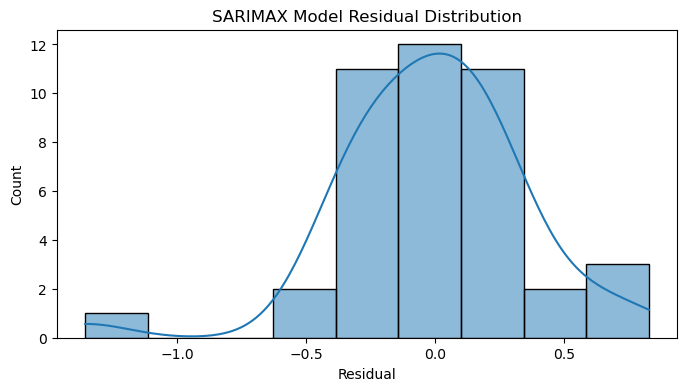

In [123]:
# Getting residuals from the SARIMAX model
residuals = sarimax_model.arima_res_.resid

# Plotting residual distribution
plt.figure(figsize=(8, 4))
sns.histplot(x = residuals, kde=True)

# Formatting plot
plt.title("SARIMAX Model Residual Distribution")
plt.xlabel("Residual")
plt.show()

## SARIMAX Residual Distribution
**Process**
- Got the residuals from the SARIMAX forecasted sales.
- Plotted and formatted a histogram showing the distribution of the residuals.

**Findings**
- The distribution of residuals are centered around 0, indicating that the model's forecasted sales in general are quite close to the actual sales. 

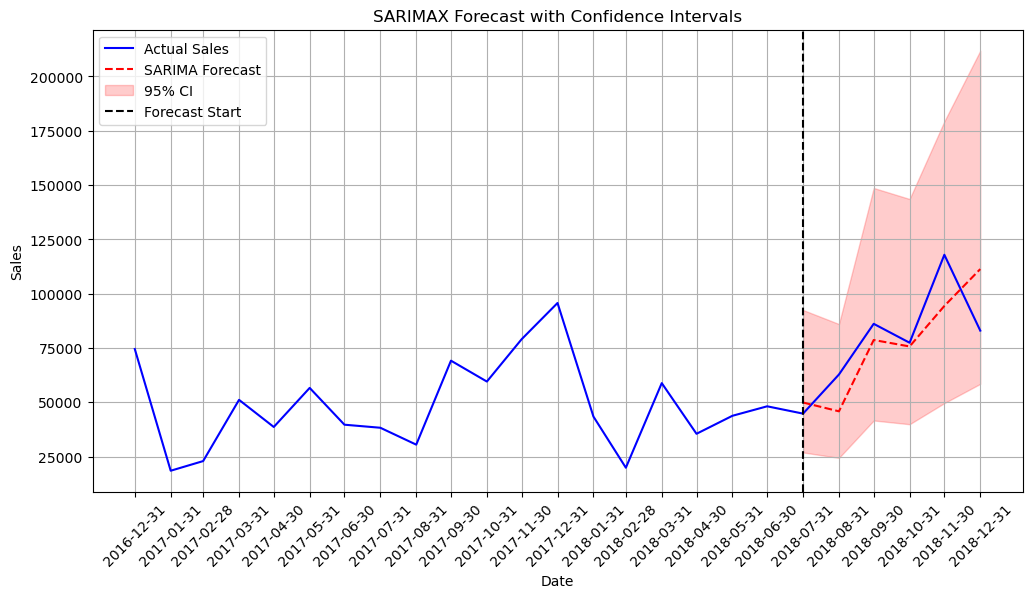

In [125]:
# Getting the SARIMAX model's forecast with a 95% confidence interval
# Getting forecast and confidence interval values
forecast, conf_int = sarimax_model.predict(n_periods=forecast_horizon, X=X_test, return_conf_int=True)
forecast = np.expm1(forecast)
conf_int = np.expm1(conf_int)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(historical_sales.index, historical_sales["Sales"], label="Actual Sales", color="blue")
plt.plot(y_true.index, forecast, label="SARIMA Forecast", color="red", linestyle="--")
plt.fill_between(X_test.index, conf_int[:, 0], conf_int[:, 1], color="red", alpha=0.2, label="95% CI")
plt.axvline(y_true.index[0], color="black", linestyle="--", label="Forecast Start")

# Formatting plot
plt.title("SARIMAX Forecast with Confidence Intervals")
plt.xlabel("Date")
plt.xticks(historical_sales.index, rotation=45)
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()

## SARIMAX Forecast with 95% Confidence Interval
**Process**
- Got the SARIMAX forecasted values for the past 6 months along with the 95% confidence interval.
- Plotted and formatted a lineplot with historical sales, forecasted sales for the last 6 months and the 95% confidence interval.

**Findings**
- The confidence interval ranges from 0.5 to 2 times the forecasted sales, indicating high uncertainty, likely due to the inherent volatility of sales.
- The actual sales consistently fall within the interval, which indicates that the model is performing well.   

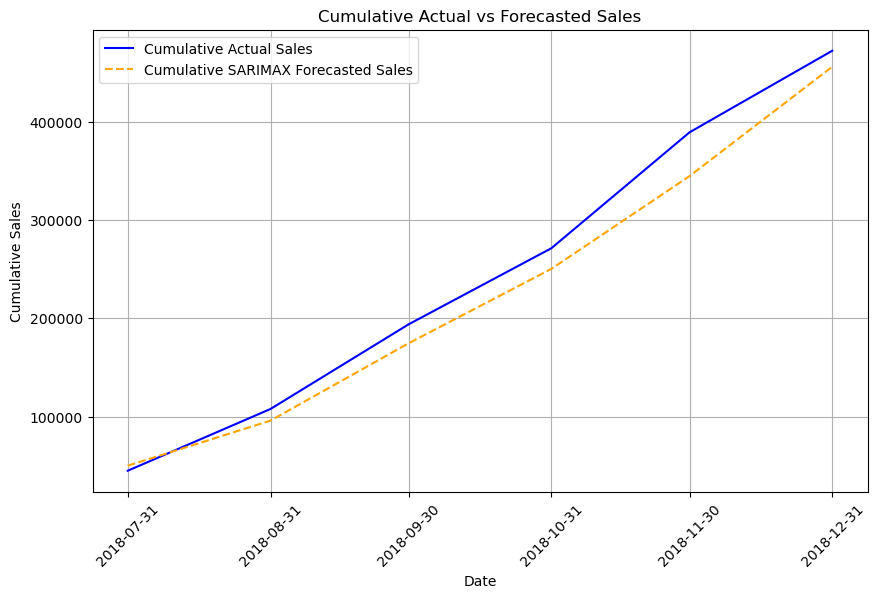

In [127]:
# Calculating cumulative actual and forecasted sales
cumulative_actual = y_true.cumsum()
cumulative_forecast = pd.Series(sarimax_forecast, index=y_true.index).cumsum()

# Plotting cumulative actual vs forecasted sales
plt.figure(figsize=(10, 6))
plt.plot(y_true.index, cumulative_actual, label="Cumulative Actual Sales", color="blue")
plt.plot(y_true.index, cumulative_forecast, label="Cumulative SARIMAX Forecasted Sales", color="orange", linestyle="--")

# Formatting plot
plt.title("Cumulative Actual vs Forecasted Sales")
plt.xlabel("Date")
plt.xticks(y_true.index, rotation=45)
plt.ylabel("Cumulative Sales")
plt.grid(True)
plt.legend()
plt.show()

## SARIMAX Cumulative Actual Vs Forecasted Sales
**Process**
- Calculated cumulative sum of actual and forecasted sales.
- Plotted and formatted lineplots of cumulative sum of actual and forecasted sales. 
  
**Findings**
- We notice the SARIMAX model's tendency to consistently underpredict the actual sales. 
- We see that over time the SARIMAX model aligns with the actual sales, indicating the model's ability to accurately predict the long term patterns of the sales. 

# Model Deployment
We deploy the model as part of a streamlit app, hosted on the streamlit community cloud. The app features an interactive analysis dashboard of the data in the dataset, as well as sales forecast visuals. 

In [130]:
# Saving data for streamlit app
import joblib

sales_complete = sales_df
sales_monthly = monthly_sales

joblib.dump(sales_complete, "data/sales_complete.pkl")
joblib.dump(sales_monthly, "data/sales_monthly.pkl")
joblib.dump(X_monthly, "data/X_monthly.pkl")

['data/X_monthly.pkl']

In [131]:
# Generating freezed package versions for the streamlit app installations to avoid intercompatibility errors with numpy
import streamlit
import numpy
import pandas
import matplotlib
import seaborn
import pmdarima
import sklearn
import joblib

with open("requirements.txt", "w") as f:
    f.write(f"streamlit == {streamlit.__version__}\n")
    f.write(f"numpy == {numpy.__version__}\n")
    f.write(f"pandas == {pandas.__version__}\n")
    f.write(f"matplotlib == {matplotlib.__version__}\n")
    f.write(f"seaborn == {seaborn.__version__}\n")
    f.write(f"pmdarima == {pmdarima.__version__}\n")
    f.write(f"scikit-learn == {sklearn.__version__}\n")
    f.write(f"joblib == {joblib.__version__}")

## Model Deployment Overview
**Process**
- Saved data we need for the streamlit app.
- Generated freezed package versions for the streamlit app.
- Created the streamlit app through the following process: 
    - Imported all packages that we need for the app.
    - Created the app title. 
    - Loaded data. 
    - Made sidebar filters. 
    - Showed filtered dataset.
    - Plotted filtered segment sales with specified segment order. 
    - Made slider to select period of actual historical sales.
    - Made slider for the forecast horizon. 
    - Created evaluation function 
    - Created forecasting function with SARIMAX model.
    - Plotted forecasted sales vs actual sales in the specified period. 
    - Made a plot of residuals for the forecasted sales. 
    - Made a plot of percentage errors for forecasted sales with MAPE.
    - Cached data loading to boost app performance. 
- Created a Github Repository with the project files.
- Connected the streamlit app to the streamlit community cloud. 

**Findings**
- The streamlit app loads within a few seconds and a forecast has been tested to take about 5 to 12 seconds.
- The model's forecasting error fluctuates between less than 1% to almost 60%, but about two thirds of forecasts from 2017-01 to 2018-12 have a forecasting error of less than 20%. The model's forecasting accuracy is therefore on average quite decent.   

# Conclusion
**Problem**

Understanding how product sales fluctuate during the year, finding primary and marginal drivers of sales and creating a forecasting model to predict future sales on a month-by-month basis. 

**Process**

We acquired sales data from the superstore, in the categories of Technology, Furniture and Office Supplies. We explored the relationships between features and the target variable of sales, cleaned it up and reduced it to the relevant features for statistical modeling. We trained ARIMA, SARIMA and Holt-Winters' Seasonal model, using a combination of winsorization to cap extreme outliers, logged sales and exogenous variables in the form of the time features "Month" and "Months Elapsed". We evaluated each model and determined the best one based on MAPE as the primary evaluation metric. We then interpreted this model by looking at its residual distribution of forecasted sales vs true sales, forecasted sales with a 95% confidence interval and its cumulative forecasted sales vs the cumulative actual sales. We then deployed it to a streamlit app featuring the filtered dataset, the filtered segment categories, the forecasted sales vs the actual sales, the residuals of the forecasted sales and the percentual errors of forecasted sales with MAPE.  

**Findings**

- More than 75% of sales have a value of less than 210 dollars. 
- There are quite a few extreme sales, with the highest sale being more than 22 thousand dollars. 
- The sales have a yearly linearly growing trend.
- The sales tend to be the highest in November and the lowest in February.
- The standard ship mode is the most heavily utilized ship mode and the same day is the lowest. 
- The west region contributes the most to sales and the south region the least. 
- The consumer segment is by far the greatest contributor to sales, with three times the sales of the lowest segment home office. 
- We sell more phones and chairs than any other type of product and barely sell any fasteners at all. 
- California and New York are the states with the highest total sales and North Dakota has the least. 
- Using exogenous timebased variables with statistical models, increases the accuracy of the models significantly. 
- The best model for forecasting sales is found to be the SARIMAX model, since it had the lowest MAPE at about 0.16 and comparable RMSE and MAE to the ARIMA and ARIMAX models. 
- The SARIMAX model have a few outlier predictions, but over time it follows the sales quite well. 
- Through testing we have found that the model's forecasting error on average is quite decent. 

**Recommendations**

We should focus on launching marketing campaigns in February, which tends to have the lowest total sales, to boost our visibility and profit during this period. We should target the home office segment, advertising the most popular phones and chairs, necessary for anyone with a home office and conduct research into determining why North Dakota has the lowest total sales. 
We should furthermore use the SARIMAX model to forecast future sales to use as a baseline against marketing efforts, to determine their profitability.
 
**Improvements**

It might be beneficial to use other statistical models such as quantile regression or bayesian structural time series, which are good for handling skewed data and outliers. Using these models could potentially yield a higher forecasting accuracy, but they may also be more computationally expensive and have a more difficult setup. We could also apply other techniques than log transformation and winsorization for handling outliers and skewness, such as robust scaling or box-cox transformation. Furthermore we could also seek to include other deterministic exogenous variables for the models, such as holidays, where sales are generally higher. 